In [1]:
import PIL
from PIL import Image
import os
import numpy as np

#from tensorflow.keras.utils import np_utils
import tensorflow as tf
import tensorflow_addons as tfa

import matplotlib.pyplot as plt

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
image = Image.open('a.JPG')
image = np.asarray(image, dtype="float32")/255.0

In [3]:
def show_trio(a,b,c):
    _, ax = plt.subplots(1,3, figsize=(9,3))
    ax[0].imshow(a)
    ax[1].imshow(b)
    ax[2].imshow(c)
    plt.show()
    

In [ ]:
Brightness

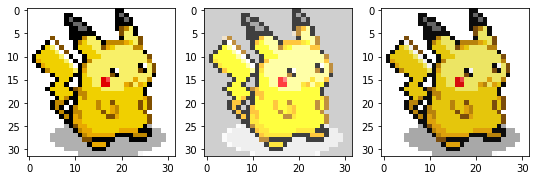

In [4]:
img1 = tf.clip_by_value(tf.image.adjust_brightness(image, delta=0.25), 0.0, 1.0)

# range [-max_delta, max_delta]
img2 = tf.clip_by_value(tf.image.random_brightness(image, max_delta = 0.25), 0, 1)

show_trio(image, img1, img2)

In [ ]:
Contrast

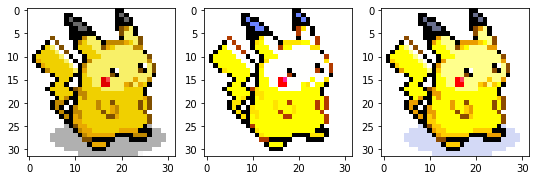

In [5]:
img1 = tf.clip_by_value(tf.image.adjust_contrast(image, contrast_factor = 3), 0.0, 1.0)

# lower and upper > 0
img2 = tf.clip_by_value(tf.image.random_contrast(image, lower=0.7, upper=2.0, seed=None), 0, 1)

show_trio(image, img1, img2)

In [ ]:
HUE

In [6]:
img1 = tf.image.adjust_hue(image, delta=-0.3)

# max_delta in [0, 0.5]
img2 = tf.image.random_hue(image, max_delta=0.20, seed=None)

show_trio(image, img1, img2)

InvalidArgumentError: input must have 3 channels but instead has 4 channels. [Op:AdjustHue]

In [ ]:
Saturation

In [7]:
img1 = tf.image.adjust_saturation(image, saturation_factor=-0.3)


# lower > 0
img2 = tf.image.random_saturation(image, lower=0.6, upper= 1.4, seed=None)

show_trio(image, img1, img2)

InvalidArgumentError: input must have 3 channels but instead has 4 channels. [Op:AdjustSaturation]

In [ ]:
#Crop

[32, 32, 4]


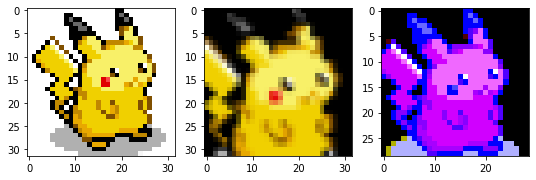

In [8]:
shape = list(image.shape)
print(shape)
img1 = tf.image.random_crop(image, size = [int(shape[0] * 0.8), int(shape[1] * 0.8), 3])
img1 = tf.image.resize(img1 , size = shape[:2])

c = tf.random.uniform(shape=(), minval=shape[0] * 0.8, maxval=shape[0], dtype=tf.dtypes.float32)
img2 = tf.image.random_crop(image, size=[c,c,3])

show_trio(image, img1, img2)

In [ ]:
#FLIP

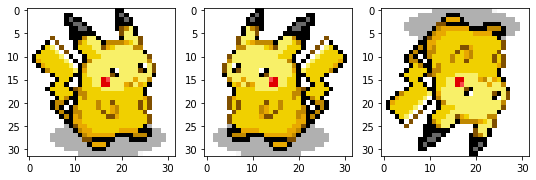

In [9]:
img1 = tf.image.random_flip_left_right(image)

img2 = tf.image.random_flip_up_down(image)

show_trio(image, img1, img2)

In [ ]:
#ROTATE

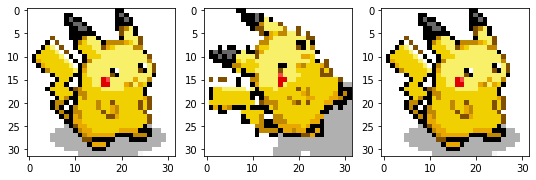

In [10]:
img1 = tfa.image.rotate(image, 0.707, fill_mode='nearest')
img2 = tfa.image.rotate(image, tf.random.uniform(shape=(), minval=-0.175, maxval=0.175))

show_trio(image, img1, img2)


In [ ]:
#Translate

In [11]:
tx = tf.random.uniform(shape=(), minval=-3, maxval=3, dtype=tf.dtypes.float32)
ty = tf.random.uniform(shape=(), minval=-3, maxval=3, dtype=tf.dtypes.float32)  

img1 = tfa.image.translate(image, [tx,ty])
   
img2 = tfa.image.translate(image, [10,-10])    
show_trio(image, img1, img2)

NotImplementedError: in user code:

    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow_addons\image\translate_ops.py:122 translate  *
        fill_value=fill_value,
    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow_addons\image\translate_ops.py:69 translations_to_projective_transforms  *
        axis=1,
    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\ops\array_ops.py:3212 ones
        output = _constant_if_small(one, shape, dtype, name)
    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\ops\array_ops.py:2896 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\numpy\core\fromnumeric.py:3051 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\numpy\core\fromnumeric.py:86 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\framework\ops.py:867 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (translate/translations_to_projective_transforms/strided_slice_1:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


In [ ]:
Shear

In [12]:
img1 = tfa.image.shear_x(image, 0.5, replace = [0,0,0])

sx = tf.random.uniform(shape=(), minval=-0.15, maxval=0.15, dtype=tf.dtypes.float32)
img2 = tfa.image.shear_x(image, sx, replace = [0,0,0])
sy = tf.random.uniform(shape=(), minval=-0.15, maxval=0.15, dtype=tf.dtypes.float32)
img2 = tfa.image.shear_y(img2, sy, replace = [0,0,0])   


show_trio(image, img1, img2)

InvalidArgumentError: condition [1024,4], then [1024,5], and else [4] must be broadcastable [Op:SelectV2]